Modeling SiO₂ growth on Si using the Deal–Grove equations, This notebook explores oxide thickness evolves with time under different process parameters.

__Default Process Parameters__
Temperature __T__; 
Native oxide thickness __di__; 
Dry or Wet oxidation; 
Diffusivity __D__; 
Solubility __C*__; 
Reaction rate constant __Ks__;
Mass transfer consatnt __h__;

In [1]:
from IPython.display import display, HTML
display(HTML('''
<style>
div.output_area {
    max-height: 1000px;
    overflow-y: visible;
}
</style>
'''))


In [2]:
%matplotlib ipympl
from math import exp, sqrt, log
from mpl_interactions import interactive_plot
import numpy as np
import mpl_interactions.ipyplot as iplt
import matplotlib.pyplot as plt
from ipywidgets import VBox

In [3]:
#Defining Constants
di = 5e-9          #native oxide thickness nm
time = 60          #oxidation time in seconds

Dry = {
    'Do' : 2.5e-3,
    'ED' : 2.5,
    'Co' : 5e16,
    'Ko' : 1e7,
    'Ek' : 2,
    'N' : 2.2e22,
    'h' : 1e5,
    'Ks': 1e7
}

Wet = {
    'Do' : 2.6e-4,
    'ED' : 1.3,
    'Co' : 5e20,
    'Ko' : 3e4,
    'Ek' : 2,
    'N' : 4.4e22,
    'h' : 1e4,
    'Ks' : 3e4
}

kB = 8.617e-5     #Blotzman constant

In [4]:
Dry_mode = True      #Change this for wet oxidation case

In [5]:
def oxide_thickness(time_array, T_Celsius):
    #Computing Temperature-Dependent Quantities
    T = T_Celsius + 273.15
    Oxi_mode = Dry if Dry_mode else Wet
    D  = Oxi_mode['Do'] * exp(-Oxi_mode['ED'] / (kB * T))          
    Cx = Oxi_mode['Co']                                            #__Neglecting activation energy for C*__
    ks = Oxi_mode['Ko'] * exp(-Oxi_mode['Ek'] / (kB * T))
    h = Oxi_mode['h']
    N = Oxi_mode['N']
    Ks = Oxi_mode['Ks']
    # After solving Deal–Grove diffrential equation we get do**2 + Ado = B (t + τ); with 3 Coefficiants A,B, and tou 
    A = 2 * D * ((1/Ks) + (1/h))
    B = (2 * D * Cx)/ N
    Tau = (di ** 2 + A * di)/B
    return [(-A + sqrt(A**2 + 4 * B * (t + Tau))) / 2 for t in time_values]

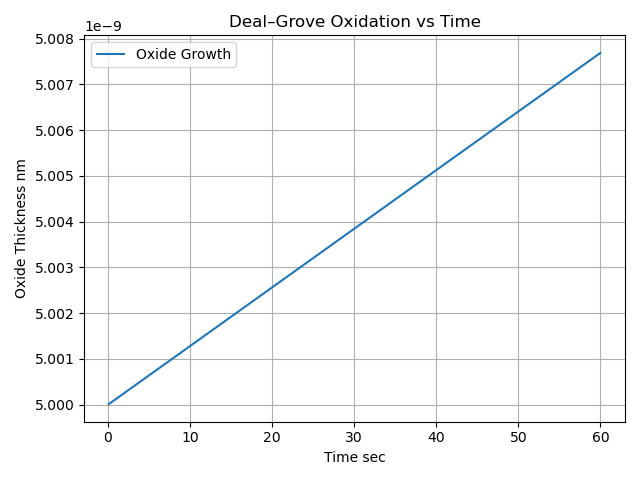

In [6]:
time_values = np.linspace(0.1, time, 200)
fig, ax = plt.subplots()
iplt.plot(time_values, oxide_thickness, T_Celsius=(700, 1300), label="Oxide Growth")
ax.set_xlabel("Time sec")
ax.set_ylabel("Oxide Thickness m")
ax.set_title("Deal–Grove Oxidation vs Time")
ax.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [14]:
def growth_rate(time_values,T_Celsius):
    return np.gradient(oxide_thickness(time_values, T_Celsius), time_values)

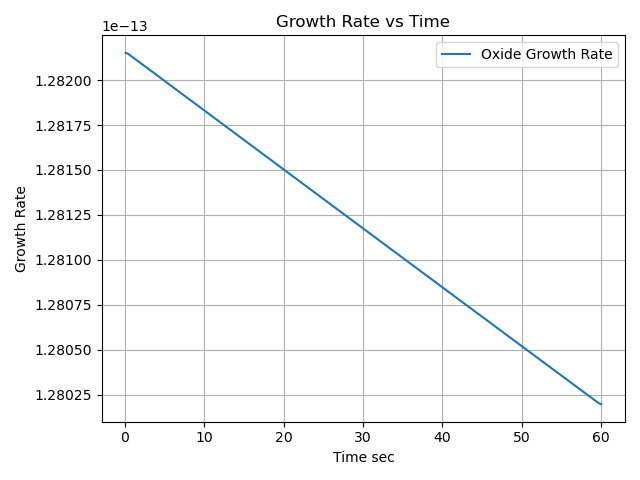

In [15]:

time_values = np.linspace(0.1, time, 200)

fig, ax = plt.subplots()
iplt.plot(
    time_values,
    growth_rate,
    T_Celsius=(700, 1300),
    label="Oxide Growth Rate"
)

ax.set_xlabel("Time sec")
ax.set_ylabel("Growth Rate")
ax.set_title("Growth Rate vs Time")
ax.grid(True)
plt.legend()
plt.tight_layout()
plt.show()